# MULTIPLE LINEAR REGRESSION

#### Assignment Task:

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


1.Perform exploratory data analysis (EDA) to gain insights into the dataset.
  Provide visualizations and summary statistics of the variables.
  Pre process the data to apply the MLR.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"D:\Assignments\MLR\ToyotaCorolla - MLR.csv")

# Display dataset information
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

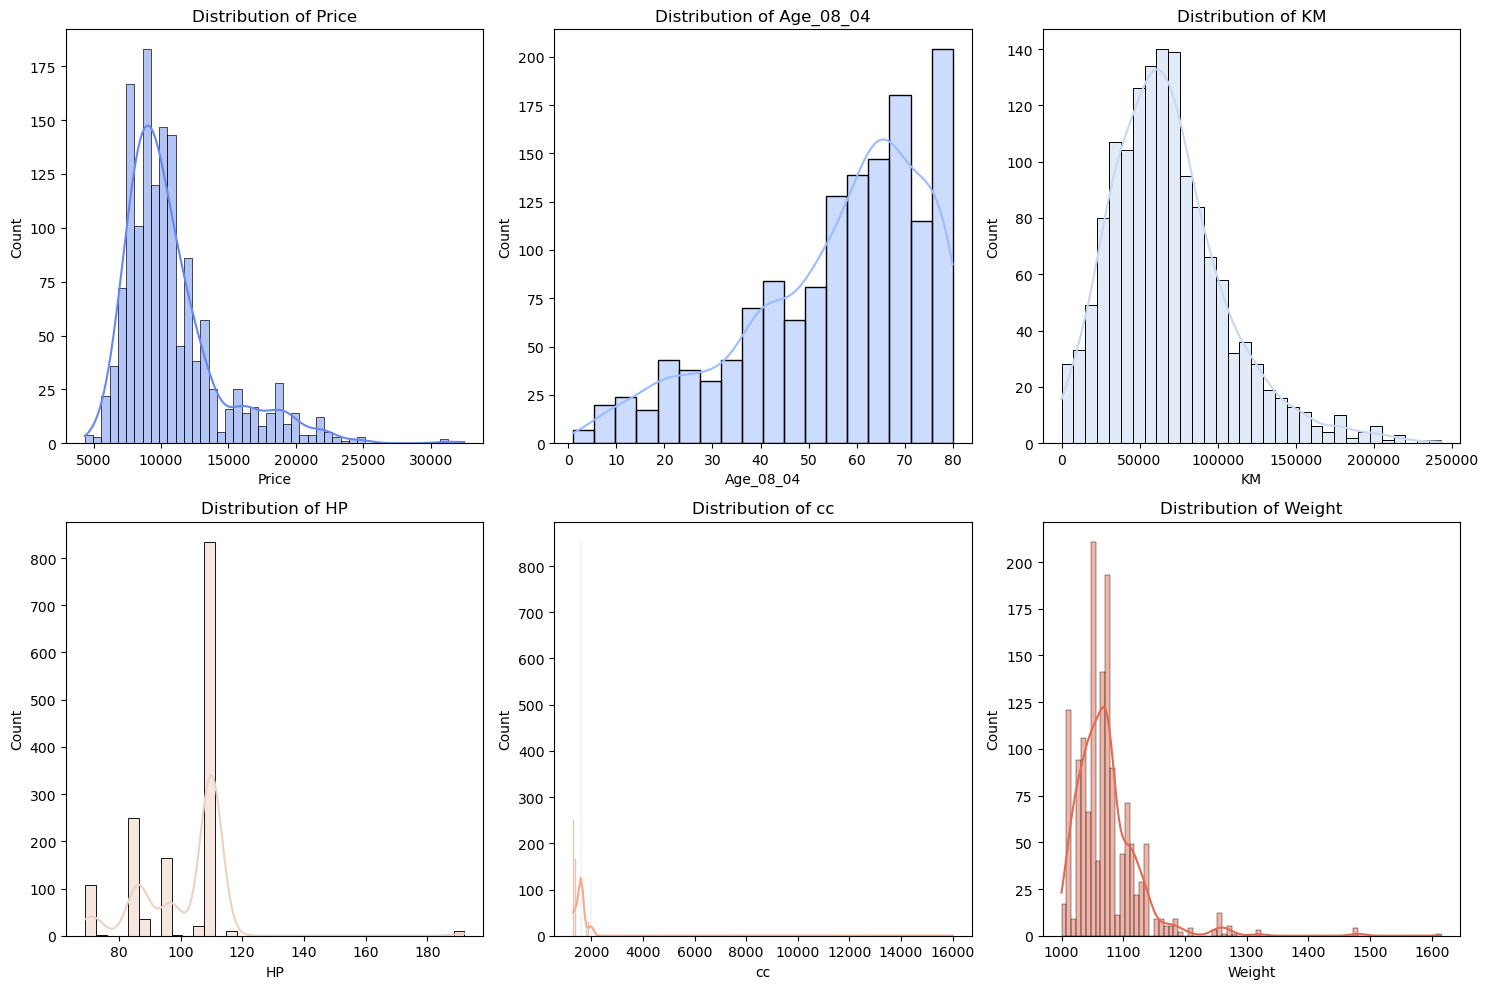

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of numerical variables
numerical_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']
sns.set_palette("coolwarm")
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, color=sns.color_palette()[i - 1])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


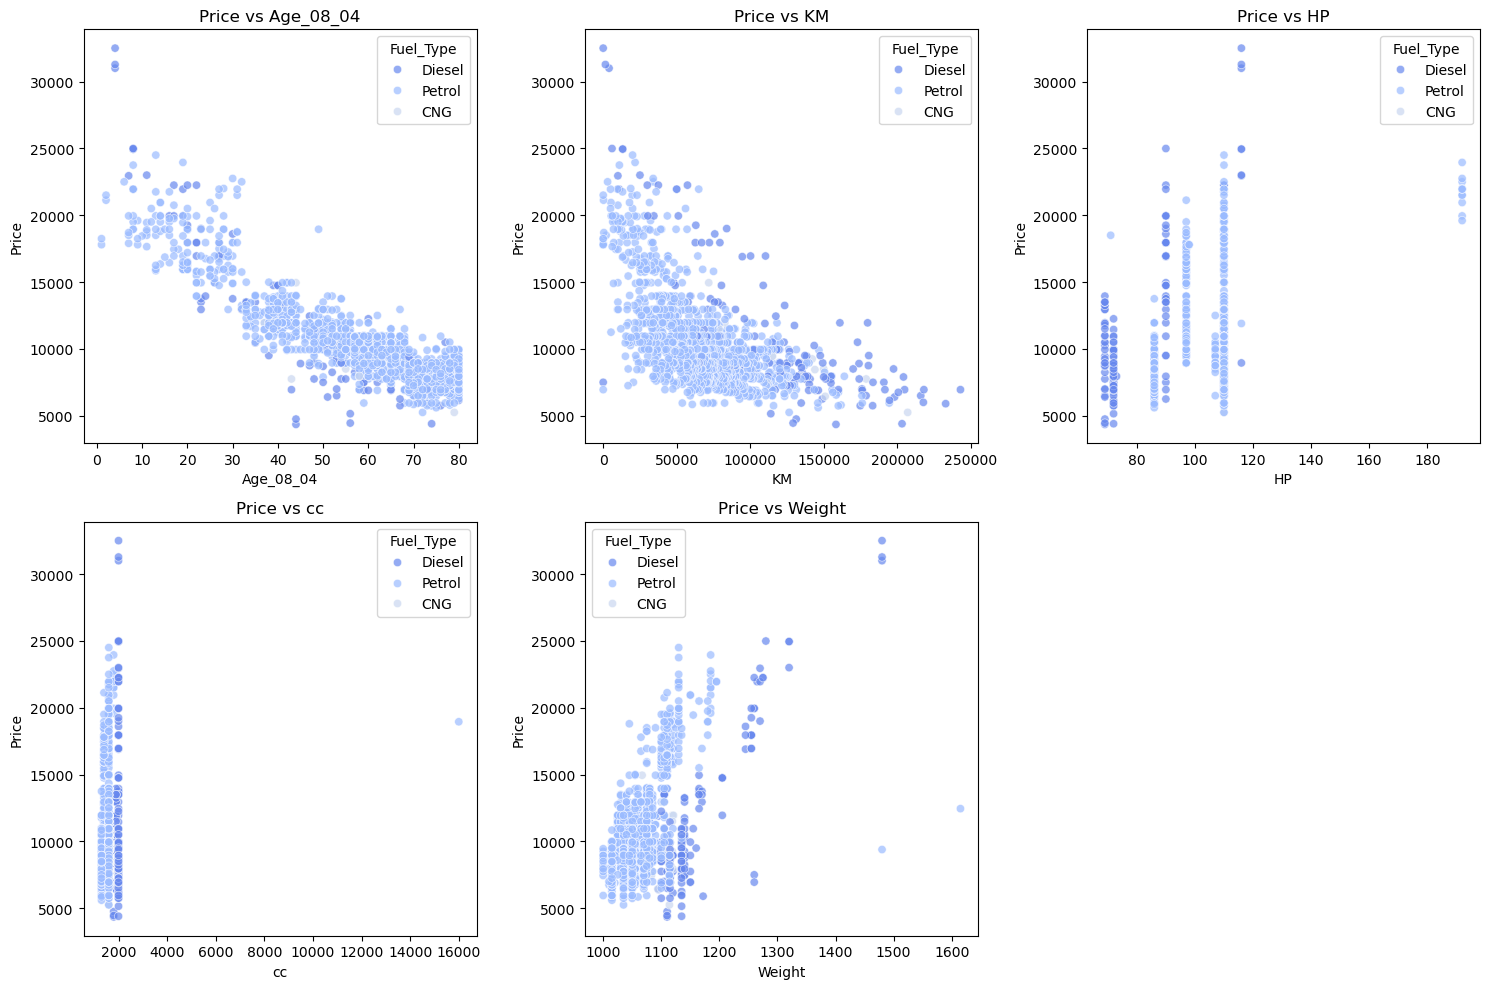

In [4]:
# Scatterplots of features vs. Price
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age_08_04', 'KM', 'HP', 'cc', 'Weight'], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data[col], y=data['Price'], hue=data['Fuel_Type'], alpha=0.7)
    plt.title(f'Price vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [5]:
# One-hot encode Fuel_Type and drop one category to avoid dummy variable trap
data_encoded = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)
print(data_encoded.head())


   Price  Age_08_04     KM  HP  Automatic    cc  Doors  Cylinders  Gears  \
0  13500         23  46986  90          0  2000      3          4      5   
1  13750         23  72937  90          0  2000      3          4      5   
2  13950         24  41711  90          0  2000      3          4      5   
3  14950         26  48000  90          0  2000      3          4      5   
4  13750         30  38500  90          0  2000      3          4      5   

   Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    1165              True             False  
1    1165              True             False  
2    1165              True             False  
3    1165              True             False  
4    1170              True             False  


In [6]:
from sklearn.preprocessing import StandardScaler

# Define features and target
X = data_encoded.drop(columns=['Price', 'Cylinders', 'Doors', 'Gears'])  # Drop less useful columns
y = data_encoded['Price']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [7]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1148, 8) (288, 8) (1148,) (288,)


3.Build a multiple linear regression model using the training dataset. 
Interpret the coefficients of the model. Build minimum of 3 different models.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predictions
y_pred = model1.predict(X_test)

# Evaluate model
print("Model 1: Using all features")
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Model 1: Using all features
R-squared: 0.8348487113704006
MSE: 2203578.771449989


4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

5.Apply Lasso and Ridge methods on the model.

In [9]:
from sklearn.linear_model import Lasso

# Apply Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Evaluate Lasso model
lasso_pred = lasso.predict(X_test)
print("Lasso Regression")
print("R-squared:", r2_score(y_test, lasso_pred))
print("MSE:", mean_squared_error(y_test, lasso_pred))


Lasso Regression
R-squared: 0.8348348737337005
MSE: 2203763.404114576


In [10]:
from sklearn.linear_model import Ridge

# Apply Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Evaluate Ridge model
ridge_pred = ridge.predict(X_test)
print("Ridge Regression")
print("R-squared:", r2_score(y_test, ridge_pred))
print("MSE:", mean_squared_error(y_test, ridge_pred))


Ridge Regression
R-squared: 0.8348619309504162
MSE: 2203402.385385241


#### Interview Questions

What is Normalization and Standardization?

Normalization scales data between 0 and 1.

Standardization scales data to have a mean of 0 and a standard deviation of 1.

Use Case: Standardization is better for algorithms assuming Gaussian data (e.g., regression, SVM).

How to Address Multicollinearity?

Detect using Variance Inflation Factor (VIF).

Apply regularization methods (Lasso or Ridge regression).